<a href="https://colab.research.google.com/github/Vijaydwivedi10/Academic_Course_Management_System/blob/master/customvgg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import tensorflow as tf
from keras.models import load_model
from glob import glob
import matplotlib.pyplot as plt
import os
import cv2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import os
# import shutil
# from sklearn.model_selection import train_test_split

# def create_train_valid_folders(root_folder, train_ratio=0.8, random_state=42):
#     # Create dummy train and dummy val folders outside dummy dataset
#     train_folder = os.path.join(root_folder, '..', 'train_dimpsar')
#     val_folder = os.path.join(root_folder, '..', 'val_dimpsar')
#     os.makedirs(train_folder, exist_ok=True)
#     os.makedirs(val_folder, exist_ok=True)

#     # Get a list of all subfolders (classes) in the root folder
#     classes = [d for d in os.listdir(root_folder) if os.path.isdir(os.path.join(root_folder, d))]

#     for class_name in classes:
#         # Get a list of all images in the current class
#         class_path = os.path.join(root_folder, class_name)
#         images = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

#         # Split the images into training and validation sets (80:20) for the current class
#         train_images, val_images = train_test_split(images, test_size=1 - train_ratio, random_state=random_state)

#         # Move training images to the dummy train folder
#         for image_name in train_images:
#             src_path = os.path.join(class_path, image_name)
#             dest_path = os.path.join(train_folder, class_name, image_name)
#             os.makedirs(os.path.join(train_folder, class_name), exist_ok=True)
#             shutil.move(src_path, dest_path)

#         # Move validation images to the dummy val folder
#         for image_name in val_images:
#             src_path = os.path.join(class_path, image_name)
#             dest_path = os.path.join(val_folder, class_name, image_name)
#             os.makedirs(os.path.join(val_folder, class_name), exist_ok=True)
#             shutil.move(src_path, dest_path)

#     print(f"Images divided into train and val for each class")

# # Example usage:
# root_folder = '/content/drive/MyDrive/dimpsar'
# create_train_valid_folders(root_folder)


ValueError: With n_samples=0, test_size=0.19999999999999996 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
IMAGE_SIZE=[224,224]
train_path='/content/drive/MyDrive/train_dimpsar'
valid_path='/content/drive/MyDrive/val_dimpsar'

In [ ]:
vgg=VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in vgg.layers:
    layer.trainable=False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
folders = glob('/content/drive/MyDrive/train_dimpsar/*')
len(folders)

11

In [ ]:
x= Flatten()(vgg.output)
x=Dense(1000,activation='relu')(x)
prediction=Dense(len(folders), activation='softmax')(x)

model=Model(inputs=vgg.input, outputs=prediction)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from keras import optimizers

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(learning_rate= 0.001), metrics=['accuracy'])

train_datagen=ImageDataGenerator(rescale=1./255, width_shift_range=0.1, height_shift_range=0.1)
test_datagen=ImageDataGenerator(rescale=1./255)



In [ ]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/train_dimpsar', target_size=(224,224),batch_size=16,class_mode='categorical')
test_set=test_datagen.flow_from_directory('/content/drive/MyDrive/val_dimpsar', target_size=(224,224),batch_size=16,class_mode='categorical')

Found 947 images belonging to 11 classes.
Found 242 images belonging to 11 classes.


In [ ]:
cla=test_set.classes
print(cla)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  5
  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  8  8  8  8  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10]


In [ ]:

r=model.fit(training_set, validation_data=test_set,epochs=20, steps_per_epoch=len(training_set), validation_steps=len(test_set))

Epoch 1/20
60/60 [==============================] - 542s 9s/step - loss: 2.9046 - accuracy: 0.4520 - val_loss: 0.6752 - val_accuracy: 0.7810
Epoch 2/20
60/60 [==============================] - 45s 754ms/step - loss: 0.5996 - accuracy: 0.7899 - val_loss: 0.6035 - val_accuracy: 0.8182
Epoch 3/20
60/60 [==============================] - 48s 798ms/step - loss: 0.3179 - accuracy: 0.8923 - val_loss: 0.5045 - val_accuracy: 0.8347
Epoch 4/20
60/60 [==============================] - 46s 759ms/step - loss: 0.1837 - accuracy: 0.9366 - val_loss: 0.3661 - val_accuracy: 0.8760
Epoch 5/20
60/60 [==============================] - 47s 789ms/step - loss: 0.1839 - accuracy: 0.9409 - val_loss: 0.2891 - val_accuracy: 0.8802
Epoch 6/20
60/60 [==============================] - 44s 727ms/step - loss: 0.1419 - accuracy: 0.9514 - val_loss: 0.3783 - val_accuracy: 0.8719
Epoch 7/20
60/60 [==============================] - 43s 713ms/step - loss: 0.1020 - accuracy: 0.9704 - val_loss: 0.2959 - val_accuracy: 0.8967
E

In [ ]:
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'], label='validation_loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss.jpg')

In [ ]:
plt.plot(r.history['accuracy'], label='Train_Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation_Accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
import matplotlib. pyplot as plt
plt.plot (r.history ["accuracy"])
plt.plot(r.history ['val_accuracy'])
plt.plot (r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title("model accuracy")
plt.ylabel ("Accuracy and Loss")
plt.xlabel ("Epoch")
plt.legend ( ["Accuracy", "Validation Accuracy", "loss", "Validation Loss"])
plt. show()

In [ ]:
model.save('Sa_VGG16_dimpsar_model.h5')
print("your model is in ==> ", os.getcwd())


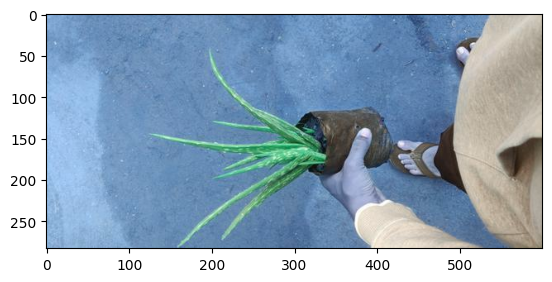

In [ ]:
# import cv2
# img=cv2.imread("/content/drive/MyDrive/dummy train/Aloevera/340.jpg")
# img-img/255
# plt.imshow(img)

In [ ]:
# train_ds=tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/train_dimpsar', validation_split=0.17, seed=123, subset="training")

Found 947 files belonging to 11 classes.
Using 787 files for training.


Testing

In [ ]:
# path="/content/drive/MyDrive/dummy val/Aloevera/339.jpg"

1/1 [==============================] - 2s 2s/step
Aloevera


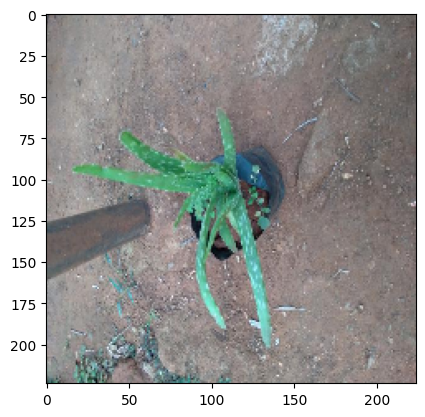

In [ ]:
# from keras.preprocessing import image
# from keras.utils import load_img
# img = load_img (path, target_size=(224,224))
# img = np.asarray (img)
# plt. imshow (img)
# img = np.expand_dims(img, axis=0)
# output = model. predict (img)
# cls = train_ds. class_names
# output = cls[np.argmax (output)]
# print (output)

In [ ]:
# output=np.argmax(output)
# print(output)

0


In [ ]:
# cls=train_ds.class_names
# cls[np.argmax(output)]

'Aloevera'

In [ ]:
import os
from keras.models import load_model

# Load the saved model
model = load_model('Sa_VGG16_dimpsar_model.h5')

# Directory containing your validation dataset
validation_data_dir = '/content/drive/MyDrive/val_dimpsar'

# Set up the ImageDataGenerator for validation
validation_datagen = ImageDataGenerator(rescale=1./255)

# Generate the validation data
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),  # Set the target size to match your model's input size
    batch_size=16,
    class_mode='categorical'  # Set class_mode to 'categorical' for multi-class classification
)

# Evaluate the model on the validation data
loss, accuracy = model.evaluate(validation_generator)
print('Validation Loss:', loss)
print('Validation Accuracy:', accuracy)


In [ ]:
import os
from keras.models import load_model

# Load the saved model
model = load_model('Sa_VGG16_dimpsar_model.h5')

# Directory containing your validation dataset
validation_data_dir = '/content/drive/MyDrive/dummy_val'

# Set up the ImageDataGenerator for validation
validation_datagen = ImageDataGenerator(rescale=1./255)

# Generate the validation data
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),  # Set the target size to match your model's input size
    batch_size=16,
    class_mode='categorical'  # Set class_mode to 'categorical' for multi-class classification
)

# Evaluate the model on the validation data
loss, accuracy = model.evaluate(validation_generator)
print('Validation Loss:', loss)
print('Validation Accuracy:', accuracy)


Found 143 images belonging to 11 classes.
9/9 [==============================] - 38s 5s/step - loss: 5.0787 - accuracy: 0.1189
Validation Loss: 5.078723430633545
Validation Accuracy: 0.11888112127780914


In [ ]:
import os
from keras.models import load_model
import random





# Load the saved model
model = load_model('Sa_VGG16_dimpsar_model.h5')

# Directory containing your validation dataset
validation_data_dir = '/content/drive/MyDrive/dummy_train'

# Set up the ImageDataGenerator for validation
train_datagen=ImageDataGenerator(rescale=1./255, width_shift_range=0.1, height_shift_range=0.1)
training_set=train_datagen.flow_from_directory(validation_data_dir, target_size=(224,224),batch_size=16,class_mode='categorical')

total_samples = len(training_set.filepaths)

# Calculate the number of samples to pick (10% of the total)
num_samples_to_pick = int(0.1 * total_samples)

# Randomly select 10% of the file paths
random_subset = random.sample(training_set.filepaths, num_samples_to_pick)

# Setting up the ImageDataGenerator for validation with only 10% of the data
subset_train_datagen = ImageDataGenerator(rescale=1./255, width_shift_range=0.1, height_shift_range=0.1)
subset_training_set = subset_train_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='training',  # This line is modified to pick only 10% of the data
    subset_directory=random_subset
)


finetune_model=model.fit(subset_training_set,epochs=20, steps_per_epoch=len(training_set))
finetune_model.save()

# # Generate the validation data
# validation_generator = validation_datagen.flow_from_directory(
#     validation_data_dir,
#     target_size=(224, 224),  # Set the target size to match your model's input size
#     batch_size=16,
#     class_mode='categorical'  # Set class_mode to 'categorical' for multi-class classification
# )

# # Evaluate the model on the validation data
# loss, accuracy = model.evaluate(validation_generator)
# print('Validation Loss:', loss)
# print('Validation Accuracy:', accuracy)
